# Data Exploration Notebook

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sys 
import matplotlib.ticker as ticker
import os
import glob
import plotly.graph_objects as go # your going to need to install plotly if you dont have it
np.set_printoptions(threshold=sys.maxsize)
pd.set_option('display.max_colwidth', None)


# Timeseries & Channel Analysis

In [4]:
# read data timeseries and channel
timeseries_df = pd.read_csv('../data/df_timeseries_en.tsv.gz', sep='\t')
channel_df = pd.read_csv('../data/df_channels_en.tsv.gz', sep='\t')

timeseries_df.dropna(axis=0, inplace=True)
channel_df.dropna(axis=0, inplace=True)

In [5]:
timeseries_df.head()

,channel,category,datetime,views,delta_views,subs,delta_subs,videos,delta_videos,activity
0,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-03 00:00:00,2.024946e+05,0.000000,650.222222,0.000000,5,0,3
1,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-10 00:00:00,3.940857e+05,191591.111111,1046.000000,395.777778,6,1,1
2,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-17 00:00:00,8.353938e+05,441308.083333,1501.500000,455.500000,6,0,1
3,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-24 00:00:00,1.104577e+06,269183.250000,1750.000000,248.500000,6,0,0
4,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-31 00:00:00,1.284406e+06,179828.600000,2008.300000,258.300000,6,0,0


In [6]:
channel_df.head()

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights
0,Gaming,2010-04-29,UC-lHJZR3Gqxm24_Vd_AJ5Yw,PewDiePie,101000000,3956,3.0,2.087
1,Education,2006-09-01,UCbCmjCuTUZos6Inko4u57UQ,Cocomelon - Nursery ...,60100000,458,7.0,2.087
2,Entertainment,2006-09-20,UCpEhnqL0y41EpW2TvWAHD7Q,SET India,56018869,32661,8.0,2.087
3,Howto & Style,2016-11-15,UC295-Dw_tDNtZXFeAPAW6Aw,5-Minute Crafts,60600000,3591,9.0,2.087
4,Sports,2007-05-11,UCJ5v_MCY6GNUBTO8-D3XoAg,WWE,48400000,43421,11.0,2.087


### Change to specific datetime format

In [7]:
# combining the channels dataframe with the time series one
timeseries_w_channels_df = pd.merge(timeseries_df,channel_df, on='channel',how='left')
timeseries_w_channels_df['datetime'] = pd.to_datetime(timeseries_w_channels_df['datetime'], format='%Y-%m-%d').dt.date
timeseries_w_channels_df['datetime'] = pd.to_datetime(timeseries_w_channels_df['datetime'], format='%Y-%m-%d')
timeseries_w_channels_df = timeseries_w_channels_df.drop(['videos_cc', 'subscribers_cc', 'subscriber_rank_sb', 'weights', 'join_date', 'category_cc', 'activity'], axis=1)

In [8]:
timeseries_w_channels_df.head()

,channel,category,datetime,views,delta_views,subs,delta_subs,videos,delta_videos,name_cc
0,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-03,2.024946e+05,0.000000,650.222222,0.000000,5,0,MagnusNation
1,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-10,3.940857e+05,191591.111111,1046.000000,395.777778,6,1,MagnusNation
2,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-17,8.353938e+05,441308.083333,1501.500000,455.500000,6,0,MagnusNation
3,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-24,1.104577e+06,269183.250000,1750.000000,248.500000,6,0,MagnusNation
4,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-31,1.284406e+06,179828.600000,2008.300000,258.300000,6,0,MagnusNation


In [9]:
# gets the videos grouped by categories
timeseries_w_channels_df.groupby(by=['category'])['category'].count().sort_values(ascending=False)

category
Music                    3532411
Entertainment            3071292
Gaming                   2825331
People & Blogs           2178182
Howto & Style            1723049
Education                1111784
Film and Animation        934776
Sports                    762263
Science & Technology      705228
Autos & Vehicles          552169
Comedy                    513748
News & Politics           323611
Travel & Events           289969
Pets & Animals            177085
Nonprofits & Activism     151017
Name: category, dtype: int64

In [10]:
print(len(timeseries_w_channels_df))

18851915


### filter dataframe for only important features

In [11]:
df = timeseries_w_channels_df.copy()
df = df.drop(['channel', 'name_cc'], axis=1)
df.head()

,category,datetime,views,delta_views,subs,delta_subs,videos,delta_videos
0,Film and Animation,2017-07-03,2.024946e+05,0.000000,650.222222,0.000000,5,0
1,Film and Animation,2017-07-10,3.940857e+05,191591.111111,1046.000000,395.777778,6,1
2,Film and Animation,2017-07-17,8.353938e+05,441308.083333,1501.500000,455.500000,6,0
3,Film and Animation,2017-07-24,1.104577e+06,269183.250000,1750.000000,248.500000,6,0
4,Film and Animation,2017-07-31,1.284406e+06,179828.600000,2008.300000,258.300000,6,0


### Gets each deltaviews (views per week) for each category and sums it up to get one data point

In [12]:
df_out = (df.groupby(['category', pd.Grouper(key='datetime', freq='D')])
             .last()
             .reset_index()
         ).replace([None], [np.nan])

In [13]:
df_out['category'].value_counts()

Gaming                   334
Entertainment            333
Film and Animation       333
Howto & Style            333
People & Blogs           327
Education                323
Music                    320
Autos & Vehicles         312
Sports                   307
Comedy                   303
Pets & Animals           295
News & Politics          294
Science & Technology     287
Nonprofits & Activism    283
Travel & Events          266
Name: category, dtype: int64

### plots with no normalizations applied. Raw timeseries interactive plots using plotly

In [14]:
fig = go.Figure()
list_category = list(set(df['category']))
pal = list(sns.color_palette(palette='viridis', n_colors=len(list_category)).as_hex())

for d,p in zip(list_category, pal):
    fig.add_trace(go.Scatter(x = df_out[df_out['category']==d]['datetime'],
                             y = df_out[df_out['category']==d]['delta_views'],
                             name = d,
                             line_color = p, 
                             fill='tozeroy'))   #tozeroy 

fig.show()

- this looks bad and noisy in weeks - Simon Lee

In [15]:
fig = go.Figure()
for d,p in zip(list_category, pal):
    fig.add_trace(go.Scatter(x = df_out[df_out['category']==d]['datetime'],
                             y = df_out[df_out['category']==d]['delta_views'],
                             name = d,
                             line_color = p,
                             fill=None))   #tozeroy 
fig.update_yaxes(type="log")                             
fig.show()

In [16]:
df_out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4650 entries, 0 to 4649
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   category      4650 non-null   object        
 1   datetime      4650 non-null   datetime64[ns]
 2   views         4650 non-null   float64       
 3   delta_views   4650 non-null   float64       
 4   subs          4650 non-null   float64       
 5   delta_subs    4650 non-null   float64       
 6   videos        4650 non-null   int64         
 7   delta_videos  4650 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 290.8+ KB


In [17]:
df_out['date'] = df_out['datetime'].dt.to_period('M')

### gets the sums per month

In [18]:
df_out2 = df_out.groupby(['category', 'date']).sum()

In [19]:
df_out2

views    delta_views           subs  \
category         date                                                  
Autos & Vehicles 2015-06  9.385349e+06  312225.000000   10628.250000   
                 2015-07  8.661430e+06  281126.000000    9683.875000   
                 2015-08  1.230435e+07  294847.090909   13406.272727   
                 2015-09  2.357746e+07  571202.534091   38746.125000   
                 2015-10  3.033862e+07  686540.919689   50172.857513   
...                                ...            ...            ...   
Travel & Events  2019-05  6.624448e+06    7787.376157   88202.523148   
                 2019-06  6.657069e+06    8317.776305   88369.266835   
                 2019-07  8.365512e+06    9555.698232  110738.123016   
                 2019-08  6.726046e+06    7288.958965   88706.816919   
                 2019-09  8.449747e+06    9863.700758  110988.639015   

                          delta_subs  videos  delta_videos  
category         date                                       
Autos & Vehicles 2015-06  267.000000       0             0  
                 2015-07  249.000000       0             0  
                 2015-08  270.272727       0             0  
                 2015-09  423.602273     525             3  
                 2015-10  631.984456     714             3  
...                              ...     ...           ...  
Travel & Events  2019-05   29.325231     548             0  
                 2019-06   53.273569     548             0  
                 2019-07   49.328283     685             0  
                 2019-08   27.247475     548             0  
                 2019-09   11.071970     685             0  

[789 rows x 6 columns]

In [20]:
df_out2.reset_index(inplace=True)
df_out2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 789 entries, 0 to 788
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype    
---  ------        --------------  -----    
 0   category      789 non-null    object   
 1   date          789 non-null    period[M]
 2   views         789 non-null    float64  
 3   delta_views   789 non-null    float64  
 4   subs          789 non-null    float64  
 5   delta_subs    789 non-null    float64  
 6   videos        789 non-null    int64    
 7   delta_videos  789 non-null    int64    
dtypes: float64(4), int64(2), object(1), period[M](1)
memory usage: 49.4+ KB


In [21]:
df_out2

,category,date,views,delta_views,subs,delta_subs,videos,delta_videos
0,Autos & Vehicles,2015-06,9.385349e+06,312225.000000,10628.250000,267.000000,0,0
1,Autos & Vehicles,2015-07,8.661430e+06,281126.000000,9683.875000,249.000000,0,0
2,Autos & Vehicles,2015-08,1.230435e+07,294847.090909,13406.272727,270.272727,0,0
3,Autos & Vehicles,2015-09,2.357746e+07,571202.534091,38746.125000,423.602273,525,3
4,Autos & Vehicles,2015-10,3.033862e+07,686540.919689,50172.857513,631.984456,714,3
...,...,...,...,...,...,...,...,...
784,Travel & Events,2019-05,6.624448e+06,7787.376157,88202.523148,29.325231,548,0
785,Travel & Events,2019-06,6.657069e+06,8317.776305,88369.266835,53.273569,548,0
786,Travel & Events,2019-07,8.365512e+06,9555.698232,110738.123016,49.328283,685,0
787,Travel & Events,2019-08,6.726046e+06,7288.958965,88706.816919,27.247475,548,0


In [22]:
df_out2['date'] = df_out2['date'].astype(str)
df_out2['date'] = pd.to_datetime(df_out2['date'])
df_out2

,category,date,views,delta_views,subs,delta_subs,videos,delta_videos
0,Autos & Vehicles,2015-06-01,9.385349e+06,312225.000000,10628.250000,267.000000,0,0
1,Autos & Vehicles,2015-07-01,8.661430e+06,281126.000000,9683.875000,249.000000,0,0
2,Autos & Vehicles,2015-08-01,1.230435e+07,294847.090909,13406.272727,270.272727,0,0
3,Autos & Vehicles,2015-09-01,2.357746e+07,571202.534091,38746.125000,423.602273,525,3
4,Autos & Vehicles,2015-10-01,3.033862e+07,686540.919689,50172.857513,631.984456,714,3
...,...,...,...,...,...,...,...,...
784,Travel & Events,2019-05-01,6.624448e+06,7787.376157,88202.523148,29.325231,548,0
785,Travel & Events,2019-06-01,6.657069e+06,8317.776305,88369.266835,53.273569,548,0
786,Travel & Events,2019-07-01,8.365512e+06,9555.698232,110738.123016,49.328283,685,0
787,Travel & Events,2019-08-01,6.726046e+06,7288.958965,88706.816919,27.247475,548,0


In [23]:
df_out2['category'].value_counts()

Entertainment            57
Film and Animation       57
Gaming                   57
Howto & Style            57
People & Blogs           56
Education                55
Music                    54
Autos & Vehicles         52
Sports                   52
Comedy                   51
Pets & Animals           50
News & Politics          48
Nonprofits & Activism    48
Science & Technology     48
Travel & Events          47
Name: category, dtype: int64

### Looks much better

In [24]:
# interactive plots
list_category = list(set(df_out2['category']))

#extract color palette, the palette can be changed
pal = list(sns.color_palette(palette='viridis', n_colors=len(list_category)).as_hex())

fig = go.Figure()
for d,p in zip(list_category, pal):
    fig.add_trace(go.Scatter(x = df_out2[df_out2['category']==d]['date'],
                             y = df_out2[df_out2['category']==d]['delta_views'],
                             name = d,
                             line_color = p, 
                             fill='tozeroy'))   #tozeroy 

fig.show()

### However if log transformed, it can capture whole time series 

In [25]:
# interactive plots
list_category = list(set(df_out2['category']))

#extract color palette, the palette can be changed
pal = list(sns.color_palette(palette='viridis', n_colors=len(list_category)).as_hex())

fig = go.Figure()
for d,p in zip(list_category, pal):
    fig.add_trace(go.Scatter(x = df_out2[df_out2['category']==d]['date'],
                             y = df_out2[df_out2['category']==d]['delta_views'],
                             name = d,
                             line_color = p, 
                             fill='tozeroy'))   #tozeroy 
fig.update_yaxes(type="log")
fig.show()

### Another visualization method to see the densities in a matrix heat map

In [26]:
df_pivot = pd.pivot_table(df_out2,
                          values='delta_views',
                          index='category',
                          columns='date')
#df_pivot.interpolate(method='polynomial', order=2)
df_pivot = df_pivot.round(2)
df_pivot = df_pivot.fillna(0)
df_pivot

date,2015-01-01,2015-02-01,2015-03-01,2015-04-01,2015-05-01,2015-06-01,2015-07-01,2015-08-01,2015-09-01,2015-10-01,...,2018-12-01,2019-01-01,2019-02-01,2019-03-01,2019-04-01,2019-05-01,2019-06-01,2019-07-01,2019-08-01,2019-09-01
category,,,,,,,,,,,,,,,,,,,,,
Autos & Vehicles,0.00,0.00,0.00,0.00,0.00,312225.00,281126.00,294847.09,571202.53,686540.92,...,320293.11,263141.70,281243.84,262504.06,374007.85,288416.40,263080.97,305770.12,250757.50,332901.57
Comedy,0.00,0.00,0.00,0.00,0.00,0.00,101426.67,264265.83,422272.50,238643.75,...,3087851.19,2819794.96,3602668.52,3490319.34,3712044.60,2895089.56,3259193.76,5352544.49,3629245.65,3712469.49
Education,0.00,0.00,308948.92,54899.62,150465.75,149568.62,0.00,0.00,0.00,141915.61,...,68742.71,40356.90,114986.53,156453.47,41941.24,26141.31,21022.45,30687.24,15889.50,21977.33
Entertainment,2062025.00,2813120.17,1690431.39,271379.71,352956.60,440663.66,322202.05,436659.12,70376.58,48817.55,...,10710386.81,8011838.49,7684896.88,10445362.48,4917453.52,6035700.12,9032064.00,10208349.88,17180795.25,19429189.93
Film and Animation,19730.75,30101.50,33195.23,24602.02,25230.03,37244.04,10105.27,19975.62,15980.50,166521.82,...,1868473.73,504128.36,326054.09,226986.89,299676.38,193010.00,164250.00,265867.50,249360.50,1192034.39
Gaming,29364.65,1857.10,1592.83,1845.49,1983.52,400.09,320.07,400.09,320.07,1336.94,...,64948.04,774255.94,515918.95,919768.33,858329.12,920401.78,1075548.01,1161955.26,906306.81,1207218.07
Howto & Style,441859.10,67.65,77.12,24069.00,78567.27,66474.98,48308.48,80171.72,110786.04,270189.39,...,510676.49,452149.74,451737.43,418579.66,209997.46,153884.25,158386.50,176381.75,126077.25,123926.61
Music,0.00,0.00,0.00,30873.75,36966.25,91014.12,84489.82,113043.68,108870.50,169019.98,...,2988841.34,2430889.93,2707781.75,2452573.38,2639863.29,2238437.75,2233041.50,2668620.12,1957593.00,2317162.21
News & Politics,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,133166.10,...,514039.05,137551.22,128947.33,8912661.51,6256039.24,1086108.38,1310521.12,592602.50,1038196.50,1647197.29


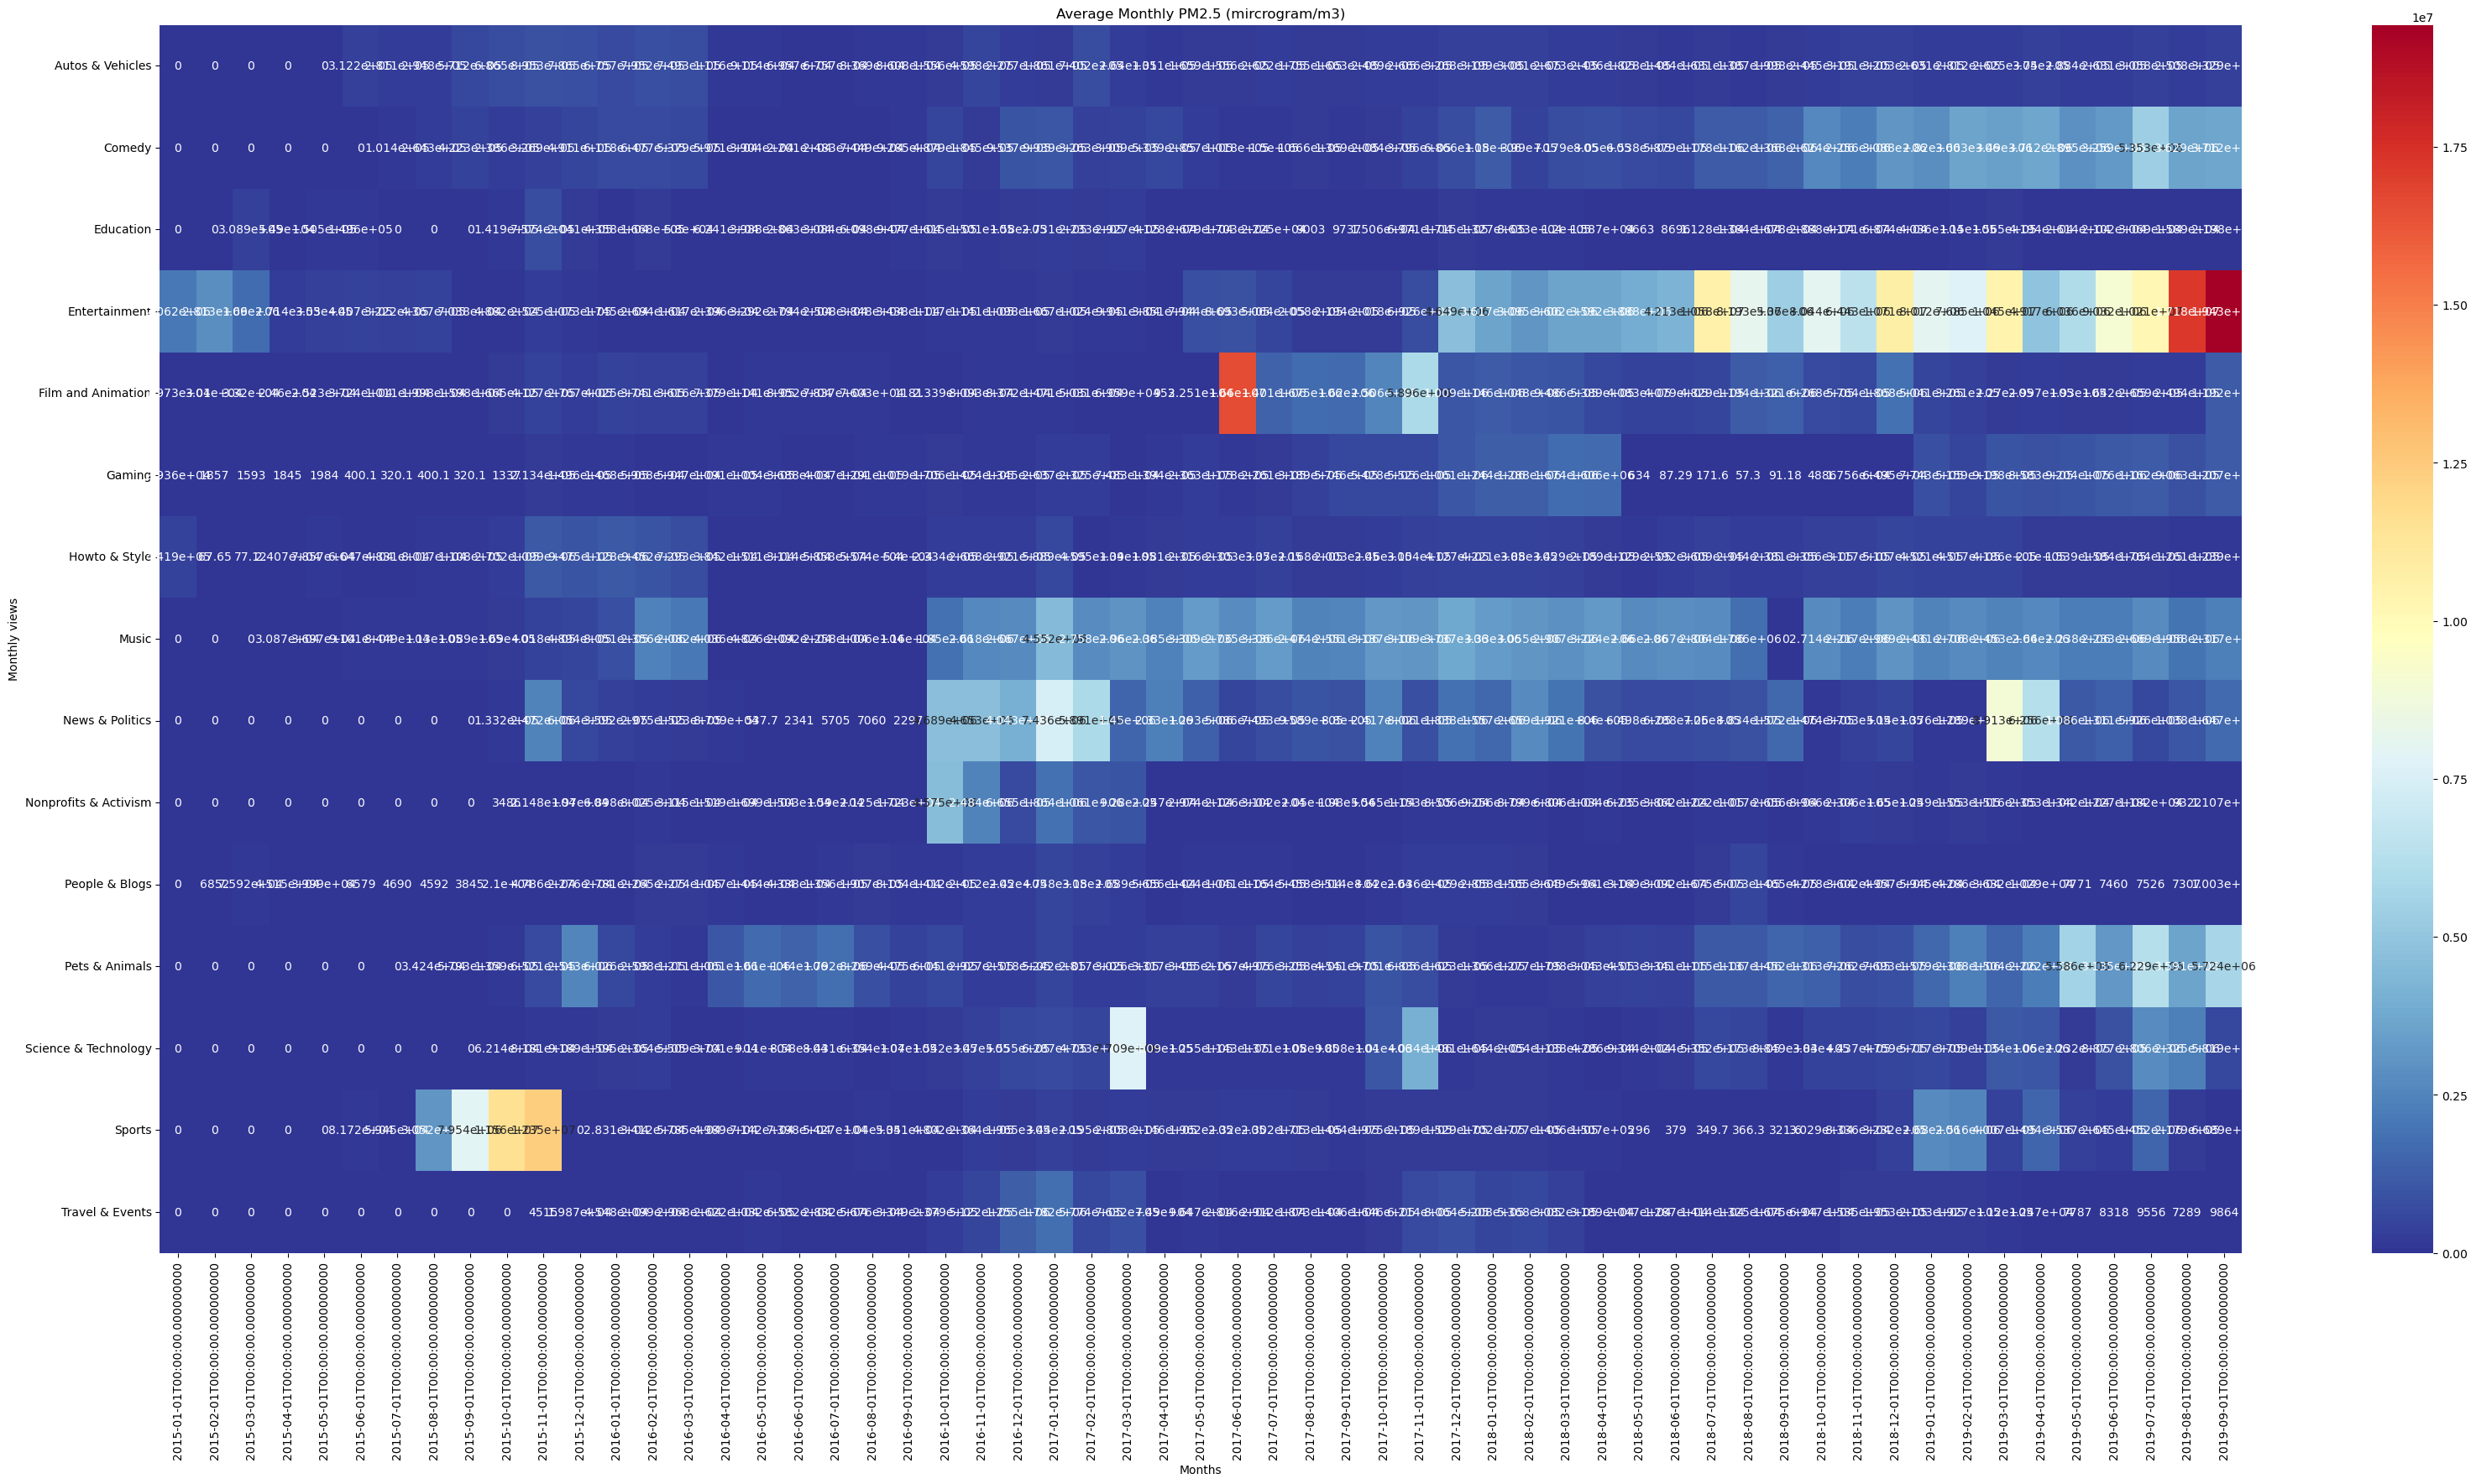

In [27]:
plt.figure(figsize = (40,19))
plt.title('Average Monthly PM2.5 (mircrogram/m3)')

sns.heatmap(df_pivot, annot=True, cmap='RdYlBu_r', fmt= '.4g',)
plt.xlabel('Months')
plt.ylabel('Monthly views')
plt.show()

# Clustering

- I am going to cluter using a transformer and the cosine similarity function

## dont run unless you need to generate data!

In [28]:
# # Opening JSON file in chunks and converts it to csv. Don't generate files if you don't need to.
# chunksize = 10 ** 5
# i = 0
# for chunk in pd.read_json('../data/yt_metadata_en.jsonl.gz', lines=True,  chunksize=chunksize):
#     i +=1
#     file = pd.DataFrame(chunk)
#     file.to_csv('../data/metadata_chunks/metadata_'+str(i)+'.csv.gz')

# combine all the generated chunks into one df

In [29]:
path = '../data/metadata_chunks/'
file_list = os.listdir(path)
file_list

['metadata_522.csv.gz',
 'metadata_273.csv.gz',
 'metadata_422.csv.gz',
 'metadata_373.csv.gz',
 'metadata_33.csv.gz',
 'metadata_541.csv.gz',
 'metadata_210.csv.gz',
 'metadata_50.csv.gz',
 'metadata_441.csv.gz',
 'metadata_310.csv.gz',
 'metadata_21.csv.gz',
 'metadata_361.csv.gz',
 'metadata_430.csv.gz',
 'metadata_261.csv.gz',
 'metadata_530.csv.gz',
 'metadata_302.csv.gz',
 'metadata_453.csv.gz',
 'metadata_42.csv.gz',
 'metadata_202.csv.gz',
 'metadata_553.csv.gz',
 'metadata_406.csv.gz',
 'metadata_357.csv.gz',
 'metadata_17.csv.gz',
 'metadata_506.csv.gz',
 'metadata_257.csv.gz',
 'metadata_418.csv.gz',
 'metadata_349.csv.gz',
 'metadata_518.csv.gz',
 'metadata_249.csv.gz',
 'metadata_74.csv.gz',
 'metadata_183.csv.gz',
 'metadata_465.csv.gz',
 'metadata_334.csv.gz',
 'metadata_565.csv.gz',
 'metadata_234.csv.gz',
 'metadata_245.csv.gz',
 'metadata_514.csv.gz',
 'metadata_345.csv.gz',
 'metadata_414.csv.gz',
 'metadata_238.csv.gz',
 'metadata_569.csv.gz',
 'metadata_78.csv.gz',

In [30]:
os.chdir(path)

In [31]:
#list all csv files only
print(os.getcwd())
csv_files = glob.glob('*.csv.gz')
csv_files

/Users/simonlee/ada-2022-project-chromegoldfish/data/metadata_chunks


['metadata_522.csv.gz',
 'metadata_273.csv.gz',
 'metadata_422.csv.gz',
 'metadata_373.csv.gz',
 'metadata_33.csv.gz',
 'metadata_541.csv.gz',
 'metadata_210.csv.gz',
 'metadata_50.csv.gz',
 'metadata_441.csv.gz',
 'metadata_310.csv.gz',
 'metadata_21.csv.gz',
 'metadata_361.csv.gz',
 'metadata_430.csv.gz',
 'metadata_261.csv.gz',
 'metadata_530.csv.gz',
 'metadata_302.csv.gz',
 'metadata_453.csv.gz',
 'metadata_42.csv.gz',
 'metadata_202.csv.gz',
 'metadata_553.csv.gz',
 'metadata_406.csv.gz',
 'metadata_357.csv.gz',
 'metadata_17.csv.gz',
 'metadata_506.csv.gz',
 'metadata_257.csv.gz',
 'metadata_418.csv.gz',
 'metadata_349.csv.gz',
 'metadata_518.csv.gz',
 'metadata_249.csv.gz',
 'metadata_74.csv.gz',
 'metadata_183.csv.gz',
 'metadata_465.csv.gz',
 'metadata_334.csv.gz',
 'metadata_565.csv.gz',
 'metadata_234.csv.gz',
 'metadata_245.csv.gz',
 'metadata_514.csv.gz',
 'metadata_345.csv.gz',
 'metadata_414.csv.gz',
 'metadata_238.csv.gz',
 'metadata_569.csv.gz',
 'metadata_78.csv.gz',

In [32]:
# only reads specific columns since not all information is necessary.
# also only reads in subset of current dataframes since it is super massive
df = pd.DataFrame()
counter = 0
#append all files together
for file in csv_files:
            df_temp = pd.read_csv(file, usecols = ['categories','channel_id', 'description', 'title', 'tags'])
            df = df.append(df_temp, ignore_index=True)
            counter += 1
            if counter == 1:
                break
df


/var/folders/q3/z0pdr58n4bn46rs6tvs5t1y00000gn/T/ipykernel_11889/3726542819.py:8: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,categories,channel_id,description,tags,title
0,Education,UCDmxC0-UzH9BOqXN6v0tMRw,Cultural programme in Holy Mary School Ferozguda on the occasion of Christmas Celebrations.,NaN,CHRISTMAS 2014 AT HOLY MARY SCHOOL FEROZGUDA 11 DANCE BY CLASS VIII
1,Education,UCDmxC0-UzH9BOqXN6v0tMRw,Cultural programme in Holy Mary School Ferozguda on the occasion of Christmas Celebrations.,NaN,CHRISTMAS 2014 AT HOLY MARY SCHOOL FEROZGUDA 10 DANCE BY CLASS VII
2,Education,UCDmxC0-UzH9BOqXN6v0tMRw,Cultural programme in Holy Mary School Ferozguda on the occasion of Christmas Celebrations.,NaN,CHRISTMAS 2014 AT HOLY MARY SCHOOL FEROZGUDA 09 DANCE BY CLASS VI
3,Education,UCDmxC0-UzH9BOqXN6v0tMRw,Cultural programme in Holy Mary School Ferozguda on the occasion of Christmas Celebrations.,"christmas dance,dance for christmas,christmas 2014,2014 christmas",CHRISTMAS 2014 AT HOLY MARY SCHOOL FEROZGUDA 08 DANCE BY BOYS
4,Education,UCDmxC0-UzH9BOqXN6v0tMRw,2014 Christmas students and staff singing carols.,"2014 christmas,Christmas 2014,carol singing,students sing carols",CHRISTMAS 2014 AT HOLY MARY SCHOOL FEROZGUDA 04 CAROL SINGING
...,...,...,...,...,...
99995,Entertainment,UCDiFRMQWpcp8_KD4vwIVicw,"Agents Of SHIELD Season 3 Episode 10. Captain America Civil War Easter Eggs, Marvel Inhumans, Agent Carter Season 2 and Avengers Age of Ultron theories ► http://bit.ly/AwesomeSubscribe\nCaptain America Civil War Trailer ► http://bit.ly/1HlRSD3\nThe Flash Season 2 Episode 9 ► http://bit.ly/1SNsYx0\nEmergency Awesome Summer Alerts ► http://bit.ly/1hua3e6\n\nTwitch Channel http://twitch.tv/emergencyawesome\nTwitter http://twitter.com/awesomemergency\nFacebook http://facebook.com/emergencyawesome\nInstagram http://instagram.com/emergencyawesome\nTumblr http://robotchallenger.com\n\n\n::Playlists For Shows::\n\nThe Walking Dead Season 5 ► http://bit.ly/WalkingDeadVids\nDoctor Who Series 8 ► http://bit.ly/DoctorWhoSeries8\nGame of Thrones Season 5 ► http://bit.ly/GameOfThronesSeason4\nSherlock Season 3 ► http://bit.ly/SherlockSeason3\nArrow Season 3 ► http://bit.ly/ArrowVids\nAnime Club ► http://bit.ly/AnimeClub\nLegend of Korra Book 4 ► http://bit.ly/LegendOfKorraBook3\nOrphan Black Season 2 ► http://bit.ly/OrphanBlackSeason2\nAsk Emergency Q&As ► http://bit.ly/QandA_Vids\nMarvel ► http://bit.ly/MarvelVids\nNew Emergency Awesome ► http://bit.ly/EmergencyAwesome\n\nWordpress Blog ► http://emergencyawesome.com\n\n\nTHANKS FOR WATCHING!!","Agents of SHIELD Season 3 Episode 10,Agents of SHIELD Season 3,Agents of SHIELD,Marvel,Captain America Civil War,Captain America Civil War Trailer,Emergency Awesome,Marvel Phase 3,Captain America,Chris Evans,Black Panther,Agent Carter Season 2,emergencyawesome,Charlie Schneider,Iron Man,Robert Downey Jr,Inhumans,Marvel Inhumans,Agents Of SHIELD 3x10,Captain America vs Iron Man,Thor Ragnarok",Agents Of SHIELD Season 3 Episode 10 - TOP 5 WTF and Marvel Easter Eggs
99996,Entertainment,UCDiFRMQWpcp8_KD4vwIVicw,"The Flash Season 2 Episode 9 Mid Finale. Harrison Wells vs Zoom, Jesse Quick, The Flash vs Trickster Weather Wizard, Wally West and Star Wars Easter Eggs ► http://bit.ly/AwesomeSubscribe\nSupergirl Episode 7 Epic Reveal ► http://bit.ly/1NUjt0R\nGame Of Thrones Season 6 Teaser Trailer ► http://bit.ly/1Qiuhoe\nEmergency Awesome Summer Alerts ► http://bit.ly/1hua3e6\n\nTwitch Channel http://twitch.tv/emergencyawesome\nTwitter http://twitter.com/awesomemergency\nFacebook http://facebook.com/emergencyawesome\nInstagram http://instagram.com/emergencyawesome\nTumblr http://robotchallenger.com\n\n\n::Playlists For Shows::\n\nDoctor Who Series 8 ► http://bit.ly/DoctorWhoSeries8\nGame of Thrones Season 5 ► http://bit.ly/GameOfThronesSeason4\nSherlock Season 3 ► http://bit.ly/SherlockSeason3\nArrow Season 3 ► http://bit.ly/ArrowVids\nAnime Club ► http://bit.ly/AnimeClub\nLegend of Korra Book 4 ► http://bit.ly/LegendOfKorraBook3\nOrphan Black Season 2 ► http://bit.ly/OrphanBlackSeason2\nAsk Emergency Q&As ► http://bit.ly/QandA_Vids\nMarvel 

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   categories   100000 non-null  object
 1   channel_id   100000 non-null  object
 2   description  94958 non-null   object
 3   tags         93375 non-null   object
 4   title        100000 non-null  object
dtypes: object(5)
memory usage: 3.8+ MB


In [34]:
# removes duplicates of videos 
df_raw = df.drop_duplicates(subset=['title'])

In [35]:
df_raw["video_info"] = df_raw['title'].astype(str) +": "+ df_raw["description"]
df_raw

/var/folders/q3/z0pdr58n4bn46rs6tvs5t1y00000gn/T/ipykernel_11889/29590235.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,categories,channel_id,description,tags,title,video_info
0,Education,UCDmxC0-UzH9BOqXN6v0tMRw,Cultural programme in Holy Mary School Ferozguda on the occasion of Christmas Celebrations.,NaN,CHRISTMAS 2014 AT HOLY MARY SCHOOL FEROZGUDA 11 DANCE BY CLASS VIII,CHRISTMAS 2014 AT HOLY MARY SCHOOL FEROZGUDA 11 DANCE BY CLASS VIII: Cultural programme in Holy Mary School Ferozguda on the occasion of Christmas Celebrations.
1,Education,UCDmxC0-UzH9BOqXN6v0tMRw,Cultural programme in Holy Mary School Ferozguda on the occasion of Christmas Celebrations.,NaN,CHRISTMAS 2014 AT HOLY MARY SCHOOL FEROZGUDA 10 DANCE BY CLASS VII,CHRISTMAS 2014 AT HOLY MARY SCHOOL FEROZGUDA 10 DANCE BY CLASS VII: Cultural programme in Holy Mary School Ferozguda on the occasion of Christmas Celebrations.
2,Education,UCDmxC0-UzH9BOqXN6v0tMRw,Cultural programme in Holy Mary School Ferozguda on the occasion of Christmas Celebrations.,NaN,CHRISTMAS 2014 AT HOLY MARY SCHOOL FEROZGUDA 09 DANCE BY CLASS VI,CHRISTMAS 2014 AT HOLY MARY SCHOOL FEROZGUDA 09 DANCE BY CLASS VI: Cultural programme in Holy Mary School Ferozguda on the occasion of Christmas Celebrations.
3,Education,UCDmxC0-UzH9BOqXN6v0tMRw,Cultural programme in Holy Mary School Ferozguda on the occasion of Christmas Celebrations.,"christmas dance,dance for christmas,christmas 2014,2014 christmas",CHRISTMAS 2014 AT HOLY MARY SCHOOL FEROZGUDA 08 DANCE BY BOYS,CHRISTMAS 2014 AT HOLY MARY SCHOOL FEROZGUDA 08 DANCE BY BOYS: Cultural programme in Holy Mary School Ferozguda on the occasion of Christmas Celebrations.
4,Education,UCDmxC0-UzH9BOqXN6v0tMRw,2014 Christmas students and staff singing carols.,"2014 christmas,Christmas 2014,carol singing,students sing carols",CHRISTMAS 2014 AT HOLY MARY SCHOOL FEROZGUDA 04 CAROL SINGING,CHRISTMAS 2014 AT HOLY MARY SCHOOL FEROZGUDA 04 CAROL SINGING: 2014 Christmas students and staff singing carols.
...,...,...,...,...,...,...
99995,Entertainment,UCDiFRMQWpcp8_KD4vwIVicw,"Agents Of SHIELD Season 3 Episode 10. Captain America Civil War Easter Eggs, Marvel Inhumans, Agent Carter Season 2 and Avengers Age of Ultron theories ► http://bit.ly/AwesomeSubscribe\nCaptain America Civil War Trailer ► http://bit.ly/1HlRSD3\nThe Flash Season 2 Episode 9 ► http://bit.ly/1SNsYx0\nEmergency Awesome Summer Alerts ► http://bit.ly/1hua3e6\n\nTwitch Channel http://twitch.tv/emergencyawesome\nTwitter http://twitter.com/awesomemergency\nFacebook http://facebook.com/emergencyawesome\nInstagram http://instagram.com/emergencyawesome\nTumblr http://robotchallenger.com\n\n\n::Playlists For Shows::\n\nThe Walking Dead Season 5 ► http://bit.ly/WalkingDeadVids\nDoctor Who Series 8 ► http://bit.ly/DoctorWhoSeries8\nGame of Thrones Season 5 ► http://bit.ly/GameOfThronesSeason4\nSherlock Season 3 ► http://bit.ly/SherlockSeason3\nArrow Season 3 ► http://bit.ly/ArrowVids\nAnime Club ► http://bit.ly/AnimeClub\nLegend of Korra Book 4 ► http://bit.ly/LegendOfKorraBook3\nOrphan Black Season 2 ► http://bit.ly/OrphanBlackSeason2\nAsk Emergency Q&As ► http://bit.ly/QandA_Vids\nMarvel ► http://bit.ly/MarvelVids\nNew Emergency Awesome ► http://bit.ly/EmergencyAwesome\n\nWordpress Blog ► http://emergencyawesome.com\n\n\nTHANKS FOR WATCHING!!","Agents of SHIELD Season 3 Episode 10,Agents of SHIELD Season 3,Agents of SHIELD,Marvel,Captain America Civil War,Captain America Civil War Trailer,Emergency Awesome,Marvel Phase 3,Captain America,Chris Evans,Black Panther,Agent Carter Season 2,emergencyawesome,Charlie Schneider,Iron Man,Robert Downey Jr,Inhumans,Marvel Inhumans,Agents Of SHIELD 3x10,Captain America vs Iron Man,Thor Ragnarok",Agents Of SHIELD Season 3 Episode 10 - TOP 5 WTF and Marvel Easter Eggs,"Agents Of SHIELD Season 3 Episode 10 - TOP 5 WTF and Marvel Easter Eggs: Agents Of SHIELD Season 3 Episode 10. Captain America Civil War Easter Eggs, Marvel Inhumans, Agent Carter Season 2 and Avengers Age of Ultron theories ► http://bit.ly/AwesomeSubscribe\nCaptain America Civil War Trailer ► http://bit.ly/1HlRSD3\nThe Flas

In [36]:
df_raw = df_raw.drop(['title'],  axis=1)
df_raw = df_raw.drop(['description'], axis=1)
df_raw

,categories,channel_id,tags,video_info
0,Education,UCDmxC0-UzH9BOqXN6v0tMRw,NaN,CHRISTMAS 2014 AT HOLY MARY SCHOOL FEROZGUDA 11 DANCE BY CLASS VIII: Cultural programme in Holy Mary School Ferozguda on the occasion of Christmas Celebrations.
1,Education,UCDmxC0-UzH9BOqXN6v0tMRw,NaN,CHRISTMAS 2014 AT HOLY MARY SCHOOL FEROZGUDA 10 DANCE BY CLASS VII: Cultural programme in Holy Mary School Ferozguda on the occasion of Christmas Celebrations.
2,Education,UCDmxC0-UzH9BOqXN6v0tMRw,NaN,CHRISTMAS 2014 AT HOLY MARY SCHOOL FEROZGUDA 09 DANCE BY CLASS VI: Cultural programme in Holy Mary School Ferozguda on the occasion of Christmas Celebrations.
3,Education,UCDmxC0-UzH9BOqXN6v0tMRw,"christmas dance,dance for christmas,christmas 2014,2014 christmas",CHRISTMAS 2014 AT HOLY MARY SCHOOL FEROZGUDA 08 DANCE BY BOYS: Cultural programme in Holy Mary School Ferozguda on the occasion of Christmas Celebrations.
4,Education,UCDmxC0-UzH9BOqXN6v0tMRw,"2014 christmas,Christmas 2014,carol singing,students sing carols",CHRISTMAS 2014 AT HOLY MARY SCHOOL FEROZGUDA 04 CAROL SINGING: 2014 Christmas students and staff singing carols.
...,...,...,...,...
99995,Entertainment,UCDiFRMQWpcp8_KD4vwIVicw,"Agents of SHIELD Season 3 Episode 10,Agents of SHIELD Season 3,Agents of SHIELD,Marvel,Captain America Civil War,Captain America Civil War Trailer,Emergency Awesome,Marvel Phase 3,Captain America,Chris Evans,Black Panther,Agent Carter Season 2,emergencyawesome,Charlie Schneider,Iron Man,Robert Downey Jr,Inhumans,Marvel Inhumans,Agents Of SHIELD 3x10,Captain America vs Iron Man,Thor Ragnarok","Agents Of SHIELD Season 3 Episode 10 - TOP 5 WTF and Marvel Easter Eggs: Agents Of SHIELD Season 3 Episode 10. Captain America Civil War Easter Eggs, Marvel Inhumans, Agent Carter Season 2 and Avengers Age of Ultron theories ► http://bit.ly/AwesomeSubscribe\nCaptain America Civil War Trailer ► http://bit.ly/1HlRSD3\nThe Flash Season 2 Episode 9 ► http://bit.ly/1SNsYx0\nEmergency Awesome Summer Alerts ► http://bit.ly/1hua3e6\n\nTwitch Channel http://twitch.tv/emergencyawesome\nTwitter http://twitter.com/awesomemergency\nFacebook http://facebook.com/emergencyawesome\nInstagram http://instagram.com/emergencyawesome\nTumblr http://robotchallenger.com\n\n\n::Playlists For Shows::\n\nThe Walking Dead Season 5 ► http://bit.ly/WalkingDeadVids\nDoctor Who Series 8 ► http://bit.ly/DoctorWhoSeries8\nGame of Thrones Season 5 ► http://bit.ly/GameOfThronesSeason4\nSherlock Season 3 ► http://bit.ly/SherlockSeason3\nArrow Season 3 ► http://bit.ly/ArrowVids\nAnime Club ► http://bit.ly/AnimeClub\nLegend of Korra Book 4 ► http://bit.ly/LegendOfKorraBook3\nOrphan Black Season 2 ► http://bit.ly/OrphanBlackSeason2\nAsk Emergency Q&As ► http://bit.ly/QandA_Vids\nMarvel ► http://bit.ly/MarvelVids\nNew Emergency Awesome ► http://bit.ly/EmergencyAwesome\n\nWordpress Blog ► http://emergencyawesome.com\n\n\nTHANKS FOR WATCHING!!"
99996,Entertainment,UCDiFRMQWpcp8_KD4vwIVicw,"The Flash Season 2 Episode 9,The Flash Season 2,The Flash 2x09,The Flash,Grant Gustin,Emergency Awesome,The Flash vs Zoom,Weather Wizard,The Flash Trickster,The Flash vs Reverse Flash,emergencyawesome,Charlie Schneider,Wally West,The Flash Wally West,The Flash Mark Hamill,mark hamill The Flash,Arrow Season 4 Episode 9,Arrow Season 4,Stephen Amell,Legends of Tomorrow,Batman v Superman,Batman v Superman Trailer","The Flash Season 2 Episode 9 Mid Finale - TOP 10 WTF and Easter Eggs: The Flash Season 2 Episode 9 Mid Finale. Harrison Wells vs Zoom, Jesse Quick, The Flash vs Trickster Weather Wizard, Wally West and Star Wars Easter Eggs ► http://bit.ly/AwesomeSubscribe\nSupergirl Episode 7 Epic Reveal ► http://bit.ly/1NUjt0R\nGame Of Thrones Season 6 Teaser Trailer ► http://bit.ly/1Qiuhoe\nEmergency Awesome Summer Alerts ► http://bit.ly/1hua3e6\n\nTwitch Channel http://twitch.tv/emergencyawesome\nTwitter http://twitter.com/awesomemergency\nFacebook http://facebook.com/emergencyawesome\nInstagram http://instagram.com/emergencyawesome\nTumbl

# Import transformers and cluster on different metrics 
- title
- description

First things first we must download the BERT model developed by Huggingface using the following command:

```pip install -U sentence-transformers```

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from sentence_transformers import SentenceTransformer
import pickle

/Users/simonlee/opt/anaconda3/envs/ada/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



In [38]:
import os
import random
import re
import string

import nltk
import numpy as np
import pandas as pd

from gensim.models import Word2Vec

from nltk import word_tokenize
from nltk.corpus import stopwords

from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_samples, silhouette_score

nltk.download("stopwords")
nltk.download('punkt')

SEED = 42
random.seed(SEED)
os.environ["PYTHONHASHSEED"] = str(SEED)
np.random.seed(SEED)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/simonlee/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/simonlee/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


The data needs to be cleaned from punctuation, letters, and stopwords (a set of words with a low value for the language modeling that can be filtered out).

In [39]:
# a function that cleans our video info
def clean_text(text, tokenizer, stopwords):
    text = str(text).lower()  # Lowercase words
    text = re.sub(r"\[(.*?)\]", "", text)  # Remove [+XYZ chars] in content
    text = re.sub(r"\s+", " ", text)  # Remove multiple spaces in content
    text = re.sub(r"\w+…|…", "", text)  # Remove ellipsis (and last word)
    text = re.sub(r"(?<=\w)-(?=\w)", " ", text)  # Replace dash between words
    text = re.sub(
        f"[{re.escape(string.punctuation)}]", "", text
    )  # Remove punctuation

    tokens = tokenizer(text)  # Get tokens from text
    tokens = [t for t in tokens if not t in stopwords]  # Remove stopwords
    tokens = ["" if t.isdigit() else t for t in tokens]  # Remove digits
    tokens = [t for t in tokens if len(t) > 1]  # Remove short tokens
    return tokens

In [40]:
# preprocessing our dataframe to be clustered
custom_stopwords = set(stopwords.words("english"))

df = df_raw.copy()

# we need to tokenize our texts.
df["text"] = df_raw['video_info']
df["tokens"] = df["text"].map(lambda x: clean_text(x, word_tokenize, custom_stopwords))

# Remove duplicated after preprocessing
_, idx = np.unique(df["tokens"], return_index=True)
df = df.iloc[idx, :]

# Remove empty values and keep relevant columns
df = df.loc[df.tokens.map(lambda x: len(x) > 0), ["text", "tokens"]]

docs = df["text"].values
tokenized_docs = df["tokens"].values

print(f"Original dataframe: {df_raw.shape}")
print(f"Pre-processed dataframe: {df.shape}")

Original dataframe: (99436, 4)
Pre-processed dataframe: (90937, 2)


In [41]:
# transform our sentences into numerical vectors
model = Word2Vec(sentences=tokenized_docs, vector_size=100, workers=1, seed=SEED)

In [42]:
# example of the finding similarities between words
model.wv.most_similar("christmas")

[('merry', 0.7779889106750488),
 ('holidays', 0.6188153028488159),
 ('eve', 0.573928952217102),
 ('holiday', 0.5683959126472473),
 ('pony', 0.5632853507995605),
 ('story', 0.5501710772514343),
 ('claus', 0.5459328889846802),
 ('birthday', 0.545620858669281),
 ('��christmas', 0.5330783128738403),
 ('halloween', 0.5219197869300842)]

In [43]:
# Generate vectors for list of documents using a Word Embedding

def vectorize(list_of_docs, model):
    features = []

    for tokens in list_of_docs:
        zero_vector = np.zeros(model.vector_size)
        vectors = []
        for token in tokens:
            if token in model.wv:
                try:
                    vectors.append(model.wv[token])
                except KeyError:
                    continue
        if vectors:
            vectors = np.asarray(vectors)
            avg_vec = vectors.mean(axis=0)
            features.append(avg_vec)
        else:
            features.append(zero_vector)
    return features
    
vectorized_docs = vectorize(tokenized_docs, model=model)
len(vectorized_docs), len(vectorized_docs[0])

(90937, 100)

# Showing that Clustering Works

In [44]:
# Generate clusters and print Silhouette metrics using MBKmeans
def mbkmeans_clusters(X, k, mb, print_silhouette_values):
    """
    Params:
        X: Matrix of features.
        k: Number of clusters.
        mb: Size of mini-batches.
        print_silhouette_values: Print silhouette values per cluster.
    """
    km = MiniBatchKMeans(n_clusters=k, batch_size=mb).fit(X)
    print(f"For n_clusters = {k}")
    print(f"Silhouette coefficient: {silhouette_score(X, km.labels_):0.2f}")

    if print_silhouette_values:
        sample_silhouette_values = silhouette_samples(X, km.labels_)
        print(f"Silhouette values:")
        silhouette_values = []
        for i in range(k):
            cluster_silhouette_values = sample_silhouette_values[km.labels_ == i]
            silhouette_values.append(
                (
                    i,
                    cluster_silhouette_values.shape[0],
                    cluster_silhouette_values.mean(),
                    cluster_silhouette_values.min(),
                    cluster_silhouette_values.max(),
                )
            )
        silhouette_values = sorted(
            silhouette_values, key=lambda tup: tup[2], reverse=True
        )
        for s in silhouette_values:
            print(
                f"    Cluster {s[0]}: Size:{s[1]} | Avg:{s[2]:.2f} | Min:{s[3]:.2f} | Max: {s[4]:.2f}"
            )
    return km, km.labels_

In [82]:
clustering, cluster_labels = mbkmeans_clusters(
	X=vectorized_docs,
    k=200,
    mb=500,
    print_silhouette_values=True,
)
df_clusters = pd.DataFrame({
    "text": docs,
    "tokens": [" ".join(text) for text in tokenized_docs],
    "cluster": cluster_labels
})

For n_clusters = 200
Silhouette coefficient: 0.18
Silhouette values:
    Cluster 61: Size:155 | Avg:0.97 | Min:0.85 | Max: 0.98
    Cluster 48: Size:248 | Avg:0.89 | Min:0.08 | Max: 0.92
    Cluster 57: Size:62 | Avg:0.84 | Min:0.13 | Max: 0.89
    Cluster 124: Size:249 | Avg:0.84 | Min:0.21 | Max: 0.88
    Cluster 51: Size:218 | Avg:0.83 | Min:0.01 | Max: 0.88
    Cluster 192: Size:1022 | Avg:0.76 | Min:0.35 | Max: 0.83
    Cluster 37: Size:81 | Avg:0.73 | Min:0.18 | Max: 0.81
    Cluster 180: Size:256 | Avg:0.71 | Min:-0.04 | Max: 0.78
    Cluster 28: Size:513 | Avg:0.70 | Min:0.12 | Max: 0.78
    Cluster 82: Size:221 | Avg:0.66 | Min:0.17 | Max: 0.74
    Cluster 58: Size:300 | Avg:0.65 | Min:0.09 | Max: 0.76
    Cluster 85: Size:354 | Avg:0.64 | Min:0.04 | Max: 0.77
    Cluster 125: Size:179 | Avg:0.63 | Min:0.16 | Max: 0.75
    Cluster 24: Size:749 | Avg:0.62 | Min:0.00 | Max: 0.72
    Cluster 96: Size:254 | Avg:0.60 | Min:-0.01 | Max: 0.70
    Cluster 70: Size:346 | Avg:0.58 | Min

In [83]:
df_clusters

,text,tokens,cluster
0,WHAT IS 0÷0?! | Baldi's BRUTAL Basics in Education and Learning [HARD MODE MOD]: Response to the plethora of comments that I received on my last video saying that 0÷0= 0 or 1 on the pad when I entered nothing as an answer.\n\nCheck out EpicJake72's video on this mod!\nhttp://www.youtube.com/watch?v=S9-kseR5PG0\n\nPlay Baldi's BRUTAL Basics in Education and Learning!\nhttps://drive.google.com/file/d/1S292ZEOkAOgOeBW3IPkg1nZenSJo2th5\n\nPlay Baldi's Basics in Education and Learning!\nhttps://mystman12.itch.io/baldis-basics\n\nFacebook: https://www.facebook.com/JayskiBean/\nTwitter: https://twitter.com/JayskiBean\nInstagram: https://www.instagram.com/JayskiBean\n\nOutro Music by TeknoAXE:\nhttps://www.youtube.com/channel/UCtgf00GvfFQVsYBA7V7RwUw\nSong Link (Euphorium Celebration):\nhttp://www.youtube.com/watch?v=LvRoeU2Smms,0÷0 baldis brutal basics education learning response plethora comments received last video saying 0÷0 pad entered nothing answer check epicjake72s video mod httpwwwyoutubecomwatchvs9 kser5pg0 play baldis brutal basics education learning httpsdrivegooglecomfiled1s292zeokaogoebw3ipkg1nzensjo2th5 play baldis basics education learning httpsmystman12itchiobaldis basics facebook httpswwwfacebookcomjayskibean twitter httpstwittercomjayskibean instagram httpswwwinstagramcomjayskibean outro music teknoaxe httpswwwyoutubecomchanneluctgf00gvffqvsyba7v7rwuw song link euphorium celebration httpwwwyoutubecomwatchvlvroeu2smms,79
1,"1,000hp Fox-Body Mustang (Twin Turbo 331 Stroker Project): 331ci. Twin Turbo Fox-Body Mustang... a little ""Turbo Talk"" on a convertible Fox-Body Twin Turbo project. He made almost 1,100hp with the 88mm single, lol. Super SIK!!!\n\nFilmed, Edited & Produced by John (Trae) King @ nedaCFilms & http://www.Mustang-Town.com",1000hp fox body mustang twin turbo stroker project 331ci twin turbo fox body mustang little turbo talk convertible fox body twin turbo project made almost 1100hp 88mm single lol super sik filmed edited produced john trae king nedacfilms httpwwwmustang towncom,175
2,"1000s of Dead Fish (Maybe Millions) Wash up at Houston Yacht Club: That's a lot of dead fish. Experts say millions of Houston fish may have died due to the heat. Link: http://abc13.com/3539466/\n\nThe hot weather is being looked at as a possible cause for the death of thousands, if not millions of dead fish washing up at the Houston Yacht Club.\n\nFish kills happen in southeast Texas. That's a part of the circle of life, according to state officials.\n\nIn this case, the fish known as Menhaden, shad, or shiners found themselves with not enough oxygen.\n\nOne woman told ABC13 the first sign of trouble was the air conditioner on her boat stopped working.\n\n""When I got out here, it was like snow all over,"" Athena Barrett said.\n\nEverywhere you look at the Houston Yacht Club, you see the same thing: dead fish.\n\nDon't forget to subscribe to our channel.\n\nFollow us for more great content!\nFacebook: https://abc13.co/2HbTdO3\nTwitter: https://abc13.co/2HzMssV\nInstagram: https://abc13.co/2Hawi9U",1000s dead fish maybe millions wash houston yacht club thats lot dead fish experts say millions houston fish may died due heat link httpabc13com3539466 hot weather looked possible cause death thousands millions dead fish washing houston yacht club fish kills happen southeast texas thats part circle life according state officials case fish known menhaden shad shiners found enough oxygen one woman told abc13 first sign trouble air conditioner boat stopped working got like snow athena barrett said everywhere look houston yacht club see thing dead fish dont forget subscribe channel follow us great content facebook httpsabc13co2hbtdo3 twitter httpsabc13co2hzmssv instagram httpsabc13co2hawi9u,126
3,"1000s of fake designer bags and clothes BUSTED: Louis Vuitton, Michael Kors, Gucci, Chanel, Burberry, Rolex and more! Federal agents and Houston police officers had to bring in a semi-truck to seize all the bags, 

In [84]:
print("Most representative terms per cluster (based on centroids):")
for i in range(200):
    tokens_per_cluster = ""
    most_representative = model.wv.most_similar(positive=[clustering.cluster_centers_[i]], topn=5)
    for t in most_representative:
        tokens_per_cluster += f"{t[0]} "
    print(f"Cluster {i}: {tokens_per_cluster}")

Most representative terms per cluster (based on centroids):
Cluster 0: careers forty diversity pride began 
Cluster 1: really guys actually seriously hopefully 
Cluster 2: httpwwwyoutubecomwatchv8rg4vol51ku dueling netwotk tighter yrp 
Cluster 3: httpstwittercomgaryreyescrstatus1132729411986370560 httpstwittercomgaryreyescrstatus1146616335696310273 httpstwittercomgaryreyescrstatus1146870657306812416 datos pruebas 
Cluster 4: overwatch gameplay arena rank devsaur 
Cluster 5: amv evident decent creative sorting 
Cluster 6: httpbitly1o9ygmg httpbitlyawesomesubscribe targaryen arya daenerys 
Cluster 7: darkrp csgo httpswwwbuygamingserverscomaffphpaff162 gmod httpsteamcommunitycomgroupslostinplacerp 
Cluster 8: vous bonjour pourquoi sortie revenus 
Cluster 9: d3400 nikon 85mm misleading httphelptcd850 
Cluster 10: settings autofocus pixels configuration sensor 
Cluster 11: httpsbitlyawesomesubscribe crossover dctv teaser cyborg 
Cluster 12: halfway leaving preparing fell homeowners 
Cluster

In [85]:
test_cluster = 4
most_representative_docs = np.argsort(
    np.linalg.norm(vectorized_docs - clustering.cluster_centers_[test_cluster], axis=1)
)
for d in most_representative_docs[:10]:
    print(docs[d])
    print("-------------")

Th8 too much near to TITAN 🔥🔥 Lets Push: Watch me play Clash of Clans!
-------------
PORTAL 2 DLC MEL! EXPLOITED SKILL!  RNG TOO GOOD!: SWAG Smart Game mechanics RNG PLZ -- Watch live at http://www.twitch.tv/slaydra
-------------
Hook's Untill Dawn Playthrough | Pt 3: Why do you people play these creepy games?


If you want to see my Galaxy-Brain gameplay, come join my twitch stream.
https://www.twitch.tv/eduardo_hook

Edited by : Hunter Lewis
https://www.youtube.com/channel/UCgEqxVX-goCsInsIMCDpvJg

Thumbnail Designer: Throh - http://twitter.com/throhgames
_________________________________________________________
#Hookganggod #Compilation #Gaming
-------------
DBFZ: HookGangGod Jiren Season 2 DLC Gameplay vs iDomNYC [Dragon Ball FighterZ]: Dragon Ball FighterZ Season 2 patch has released with 2 brand new DLC characters: Jiren and Videl. Not too interested in Videl, but Jiren is super fun to play! In these matches, I'm playing Jiren, Piccolo, and SSJ Vegeta vs Android 21, Zamasu, and G

Text(0.5, 1.0, 'Counts for each cluster (n=200)')

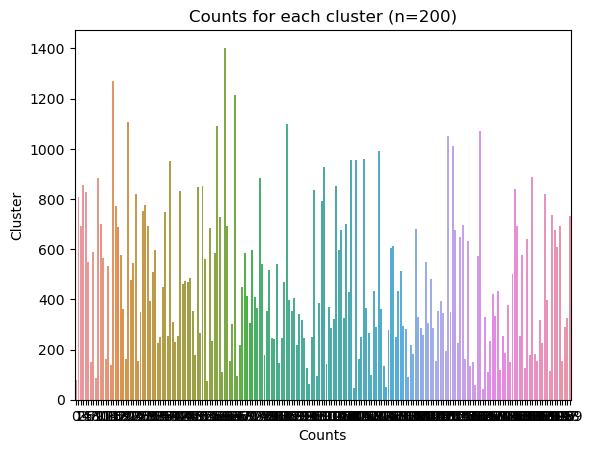

In [49]:
ax = sns.countplot(x="cluster", data=df_clusters)
ax.set_xlabel("Counts")
ax.set_ylabel("Cluster")
ax.set_title("Counts for each cluster (n=200)")

### Finding the best k for clustering by calculating Silohuette values $S(i)$ and picking the one with the highest $S(i)$

In [72]:
def mbkmeans_clusters_sil(X, k, mb, print_silhouette_values):
    """
    same as previous function except now we are interested in best k parameter 

    Params:
        X: Matrix of features.
        k: Number of clusters.
        mb: Size of mini-batches.
        print_silhouette_values: Print silhouette values per cluster.
    """
    km = MiniBatchKMeans(n_clusters=k, batch_size=mb).fit(X)
    print(f"For n_clusters = {k}")
    sample_silhouette_values = silhouette_score(X, km.labels_)
    print(f"Silhouette coefficient: {sample_silhouette_values:0.2f}")
    
    return km, km.labels_, sample_silhouette_values

In [73]:
S_value = []

In [74]:
from tqdm import tqdm

# checking for best k values. We will run on a bigger range later but for now we will demonstarte with this small sample
for i in tqdm(range(2,10)):
    print(i)
    clustering, cluster_labels, silohuette = mbkmeans_clusters_sil(X=vectorized_docs,k=i,mb=500,print_silhouette_values=True)
    S_value.append(silohuette)

  0%|          | 0/8 [00:00<?, ?it/s]

2
For n_clusters = 2


 12%|█▎        | 1/8 [01:24<09:53, 84.78s/it]

Silhouette coefficient: 0.26
3
For n_clusters = 3


 25%|██▌       | 2/8 [02:44<08:12, 82.09s/it]

Silhouette coefficient: 0.04
4
For n_clusters = 4


 38%|███▊      | 3/8 [04:07<06:50, 82.13s/it]

Silhouette coefficient: 0.10
5
For n_clusters = 5


 50%|█████     | 4/8 [05:28<05:27, 81.95s/it]

Silhouette coefficient: 0.11
6
For n_clusters = 6


 62%|██████▎   | 5/8 [07:00<04:15, 85.28s/it]

Silhouette coefficient: 0.09
7
For n_clusters = 7


 75%|███████▌  | 6/8 [08:27<02:51, 85.86s/it]

Silhouette coefficient: 0.10
8
For n_clusters = 8


 88%|████████▊ | 7/8 [09:50<01:25, 85.22s/it]

Silhouette coefficient: 0.09
9
For n_clusters = 9


100%|██████████| 8/8 [11:20<00:00, 85.10s/it]

Silhouette coefficient: 0.10


In [75]:
len(S_value)

8

8


Text(0.5, 0, 'k')

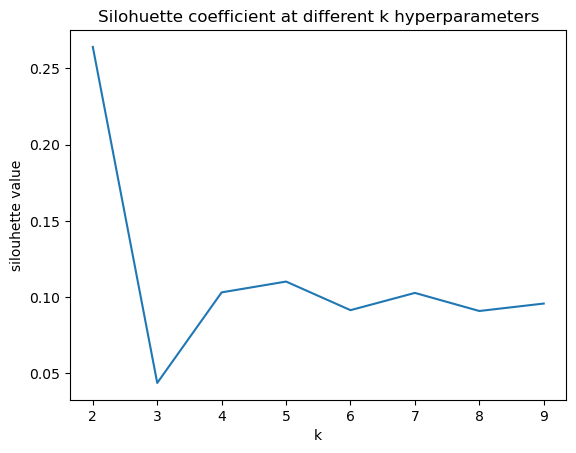

In [79]:
# plot k by S 
# selecting k based on highest S value like we learned in class
k = np.arange(2,10)
print(len(k))
sns.lineplot( x=k, y=S_value)
plt.title("Silohuette coefficient at different k hyperparameters")
plt.ylabel("silouhette value")
plt.xlabel("k")

### Counting the frequencies of specific words that show up

In [ ]:
# filter rows with specific key words. We can then obtain counts of the date and compare it to google trends data.
# This is how we classify if youtube events line up with world events (global view)
